<a href="https://colab.research.google.com/github/andrewbuko/Deep-Learning-452/blob/main/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensors
Tensors are pretty similar to arrays and matrices, and in PyTorch we use tensors to encode the inputs and outputs of a model, as well as model parameters.

In [97]:
import torch
import numpy as np

In [98]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data)
print(x_data.shape)
torch.Size([2,2])

torch.Size([2, 2])


torch.Size([2, 2])

Shape is a tuple of tensor dimensions that is meant to determine the dimensionality of the output tensor.

In [99]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")


Random Tensor: 
 tensor([[0.1183, 0.8326, 0.7862],
        [0.3680, 0.2736, 0.7937]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


From here we are going to learn slicing, joining, and multiplying.

In [100]:
tensor = torch.ones (4, 4)
print("Tensor before slicing:")
print(tensor)
tensor[:,1] = 0 #Index/slice the second column to set the values to 0
print("Tensor after slicing:")
print(tensor)

Tensor before slicing:
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
Tensor after slicing:
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [101]:
t1 = torch.cat([tensor, tensor, tensor], dim=1) #Concatenate/Join a sequence of tensors
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [102]:
# This computes the element-wise product
print(f"tensor * tensor \n {tensor * tensor}")

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [103]:
#This computes matrix multiplication between two tensors
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


Next we go over coding procedure for how to train a neural network in Python. Pretty cool stuff.

In [104]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net (nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    # 1 input image channel, 6 output channels, 5x5 square convolution
    # kernel
    self.conv1 = nn.Conv2d(1,6,5)
    self.conv2 = nn.Conv2d(6, 16, 5)
    # an affine operation: y = Wx+b
    self.fc1 = nn.Linear(16 * 5 * 5, 120) # 5*5 from image dimension
    self.fc2 = nn. Linear(120, 84)
    self.fc3 = nn. Linear(84, 10)
  def forward(self, input):
    # Convolution layer C1: 1 input image channel, 6 output channels,
    # 5x5 square convolution, it uses RELU activation function, and
    # outputs a Tensor with size (N, 6, 28, 28), where N is the size of the batch
    c1 = F.relu(self.conv1(input))
    # Subsampling Layer S2: 2x2 grid, purely functional,
    # this layer does not have any parameter, and outputs a (N, 6, 14, 14) Tensor
    s2 = F.max_pool2d(c1, (2, 2))
    # Convolution layer C3: 6 input channels, 16 output channels,
    # 5x5 square convolution, it uses RELU activation function, and
    # outputs a (N, 16, 10, 10) Tensor
    c3 = F.relu(self.conv2(s2))
    # Subsampling layer S4: 2x2 grid, purely functional,
    # this layer does not have any parameter, and outputs a (N, 16, 5, 5) Tensor
    s4 = F.max_pool2d(c3, 2)
    #Flatten operation: purely functional and outputs a (N, 400) Tensor
    s4 = torch.flatten(s4,1)
    # Fully connnected layer F5: (N, 400) Tensor input,
    # and outputs a (N, 84) Tensor, it uses RELU activation function
    f5 = F.relu(self.fc1(s4))
    # Fully connected layer F6: (N, 120) Tensor input,
    # and outputs a (N, 84) Tensor input, it uses RELU activation function
    f6 = F.relu(self.fc2(f5))
    # Gaussian layer OUTPUT: (N, 84) Tensor input, and
    # outputs a (N, 10) Tensor
    output = self.fc3(f6)
    return output

In [105]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Now we are going to work through loss function, with going through the basic example of MSEloss which computes the mean-squared error between the output and the target.

In [106]:
input = torch.randn(1,1,32,32)
output = net(input)
target = torch.randn(10)
target = target.view(1, -1) # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.2355, grad_fn=<MseLossBackward0>)


We see that we need to backpropagata as well and to do so we need to do loss.backward(), so let us do that.

In [107]:
net.zero_grad()
loss.backward()

And we also see that the siplest update rule that is used A LOT is Stochastic Gradient Descent (SGD):

In [108]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad() # zeroing the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() # Does the update

Next we are going to work with image classification stuff and learn to train an image classifier, which involves doing these steps in order:


1.   Load and normalize the CIFAR10 training and test datasets using torchvision
2.   Define a Convolutional Neural Network
3.   Define a loss function
4.   Train the network on the training data
5.   Test the network on the test data

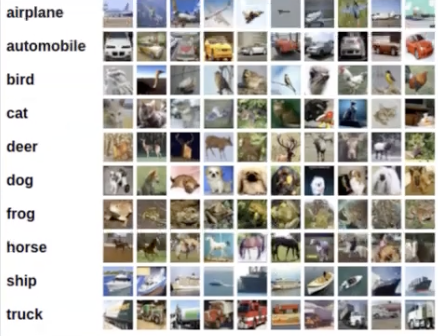

In [109]:
#Step 1: Loading the stuff
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range [0,1]. We transform them to Tensors of normalized range [-1,1] to work with them.

In [110]:
num_workers = 2 # number of threads on computer to use
batch_size = 4 # number of images we will have a batch


In [111]:
transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [112]:
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle = True, num_workers=num_workers
)
testset = torchvision.datasets.CIFAR10(
  root='./data', train=False, download=True, transform=transform
)

testloader = torch.utils.data.DataLoader(
  testset, batch_size=batch_size, shuffle=False, num_workers=num_workers
)

classes = (
  'plane','car','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck'
)

And now we show some of the training images that we have:

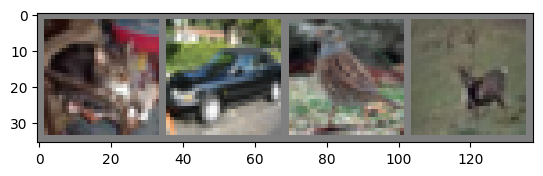

cat   car   bird  deer 


In [113]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
  img = img / 2 + 0.5 # unnormalize
  npimg = img. numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

And then we copy this from the neural network section to make it take 3 channel instead of 1:

In [114]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net (nn.Module):

  def __init__(self, use_convolutions:bool=False):
    super().__init__()
    self.use_convolutions = use_convolutions

    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.flat = nn.Flatten()
    self.conv_matcher = nn.Linear(3 * 32 * 32, 16 * 5 * 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
  def forward(self, x):
    if self.use_convolutions:
      x = self.pool(F.relu(self.conv1(x)))
      x = self.pool(F.relu(self.conv2(x)))
      x = torch.flatten(x, 1) # flatten all dimensions except batch
    else:
      x = self.flat(x)
      x = self.conv_matcher(x)
      x = F.relu(x)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return x

net = Net(use_convolutions=False)

Defining a Loss function and optimizer: We can begin by using a classification cross-entrophy loss and SGD with momentum

In [115]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=10,gamma=0.1)

# Training the network
This is when things start to get interesting, as we loop over our data iterator to get cool results :)

In [116]:
def train_step(model, data, optimizer=optimizer, criterion = criterion, scheduler=None, data_idx=None):
  inputs, labels = data
  optimizer.zero_grad()

  outputs = model(inputs)
  loss = criterion(outputs,labels)
  loss.backward()
  optimizer.step()

  return loss
def train_loop(
    model, dataloader, epochs = 2, optimizer=optimizer,
    criterion = criterion, scheduler=None, basename = '.model'
):
  model.train()
  for epoch in range(epochs):

      running_loss = 0.0
      for i, data in enumerate(dataloader, 0):
        loss = train_step(model,data,optimizer,criterion,scheduler,data_idx=1)

        #print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch+1},{i+1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

      if scheduler is not None:
        scheduler.step()

      model.eval()

  print('Finished Training')


net = Net(use_convolutions=False)
train_loop(net,trainloader,epochs=2,scheduler=scheduler)

[1, 2000] loss: 2.306
[1, 4000] loss: 2.308
[1, 6000] loss: 2.307
[1, 8000] loss: 2.307
[1,10000] loss: 2.307
[1,12000] loss: 2.305
[2, 2000] loss: 2.307
[2, 4000] loss: 2.307
[2, 6000] loss: 2.306
[2, 8000] loss: 2.306
[2,10000] loss: 2.306
[2,12000] loss: 2.306
Finished Training


In [117]:
#saving the model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

Now we can test what we have!!!

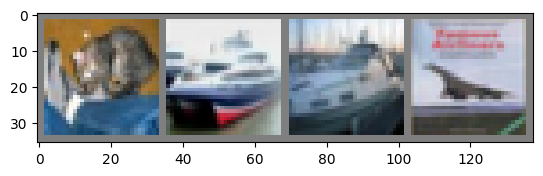

Ground truth: cat ship ship plane


In [118]:
dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('Ground truth:', ' '.join(f'{classes[labels[j]]}' for j in range(4)))

In [119]:
net = Net(use_convolutions=False)
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [120]:
net.eval()
outputs = net(images)

In [121]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
            for j in range (4)))

Predicted:  frog  frog  frog  frog 


This result should be pretty bad as it just predicts a single class for every image, and this bad behavior is called mode collapse. Let's see if we can make it better by switching to a convolutional neural network!!!

In [122]:
c_net = Net(use_convolutions=True)
c_criterion = nn.CrossEntropyLoss()
c_optimizer = optim.SGD(c_net.parameters(), lr=0.01, momentum = 0.9)
c_scheduler = StepLR(c_optimizer, step_size=10, gamma=0.1)

In [123]:
train_loop(c_net,trainloader,epochs=2,optimizer=c_optimizer,criterion=c_criterion,scheduler=c_scheduler)

[1, 2000] loss: 2.081
[1, 4000] loss: 1.957
[1, 6000] loss: 1.933
[1, 8000] loss: 1.909
[1,10000] loss: 1.939
[1,12000] loss: 1.898
[2, 2000] loss: 1.947
[2, 4000] loss: 1.943
[2, 6000] loss: 1.930
[2, 8000] loss: 1.941
[2,10000] loss: 1.952
[2,12000] loss: 1.927
Finished Training


In [124]:
PATH = './cifar_cnet.pth'
torch.save(c_net.state_dict(), PATH)

# Evaluation

In [125]:
c_net.eval()
outputs = c_net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
        for j in range(4)))



Predicted:  cat   plane plane plane


In [126]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
      images, labels = data
      outputs = c_net(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 27 %
